In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("HousingData.csv")  # Change filename if needed

# Display first few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
# Check for missing values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [13]:
for col in df.columns:
    df[col]=df[col].fillna(df[col].median())  # Using median to handle outliers

In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [17]:
# Normalize numerical features using Min-Max Scaling
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

for col in df.columns[:-1]:  # Exclude target column
    df[col] = min_max_scaling(df[col])

# Display dataset after normalization
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.267660,36.2


In [21]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop(columns=["MEDV"])  # Features
y = df["MEDV"]  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Linear Regression Model
lr_model = LinearRegressionScratch()
lr_model.fit(X_train.values, y_train.values)

# Predict on test set
y_pred_lr = lr_model.predict(X_test.values)


In [27]:
from collections import Counter
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        if depth >= self.max_depth or len(set(y)) == 1:
            return Counter(y).most_common(1)[0][0] if len(y) > 0 else 0  # Prevent IndexError

        feature_idx = np.random.randint(0, X.shape[1])
        threshold = np.median(X[:, feature_idx])

        left_idx = X[:, feature_idx] < threshold
        right_idx = ~left_idx

        # **Ensure non-empty splits**
        if sum(left_idx) == 0 or sum(right_idx) == 0:
            return Counter(y).most_common(1)[0][0]

        return {
            "feature_idx": feature_idx,
            "threshold": threshold,
            "left": self._grow_tree(X[left_idx], y[left_idx], depth + 1),
            "right": self._grow_tree(X[right_idx], y[right_idx], depth + 1),
        }


In [43]:
rf_model.fit(X_train.values, y_train.values)  # Re-train the model
y_pred_rf = rf_model.predict(X_test.values)  # Make new predictions
evaluate_model(y_test, y_pred_rf, "Random Forest")  # Try again 


Random Forest - RMSE: 6.2035, R²: 0.4752


In [51]:
class XGBoostScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []
        self.bias = 0

    def fit(self, X, y):
        self.bias = np.mean(y)
        y_pred = np.full_like(y, self.bias, dtype=float)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTree(max_depth=3)
            tree.fit(X, residuals)
            self.trees.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.bias, dtype=float)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

# Train XGBoost Model
xgb_model = XGBoostScratch(n_estimators=10, learning_rate=0.1)
xgb_model.fit(X_train.values, y_train.values)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test.values)


In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Evaluate models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Linear Regression - RMSE: 6.2099, R²: 0.4741
Random Forest - RMSE: 6.2035, R²: 0.4752
XGBoost - RMSE: 6.7979, R²: 0.3699


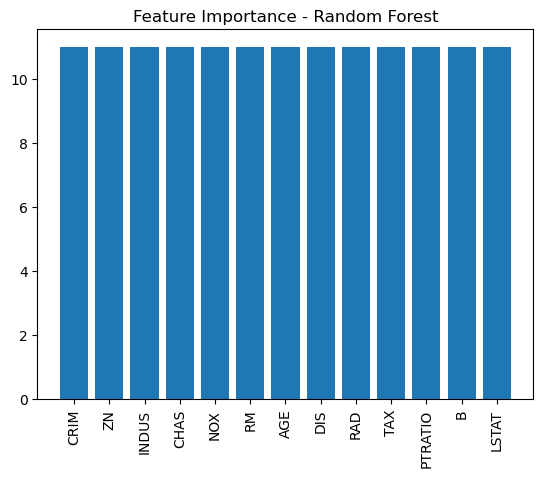

In [55]:
import matplotlib.pyplot as plt

# Random Forest Feature Importance
rf_feature_importance = np.abs(rf_model.trees[0].tree["feature_idx"])
plt.bar(X.columns, rf_feature_importance)
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()
